In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__ # pastikan menggunakan tensorflow 2.0.0

'2.1.0'

# **Load Data**

In [0]:
# download image dan extract file nya
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

**Struktur Data**
```
cats_and_dogs_filtered
|__ train
    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
```



In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

# **Understand the Data**

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
# cek jumlah data
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
# Inisiasi variable-variable yang akan digunakan
batch_size = 128
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

# **Data Preparation**

Preproses data training dilakukan
1. rescale tensore 0 sampai 255 menjadi 0 sampai 1
2. merotasi gambar 45 derajat
3. zoom range 0.5

In [0]:
# pre proses gambar sebelum digunakan untuk training dan validation
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
# setelah di pre proses diatas, bagian ini akan load image tersebut
train_data_gen =train_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='binary')

Found 1000 images belonging to 2 classes.


# **Visualize Training Images**

Menampilkan random image training

In [0]:
# ambil random image yang akan di show
sample_training_images, labels = next(train_data_gen)

In [0]:
# fungsi untuk show image yang sudah dilakukan pre prosessing
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

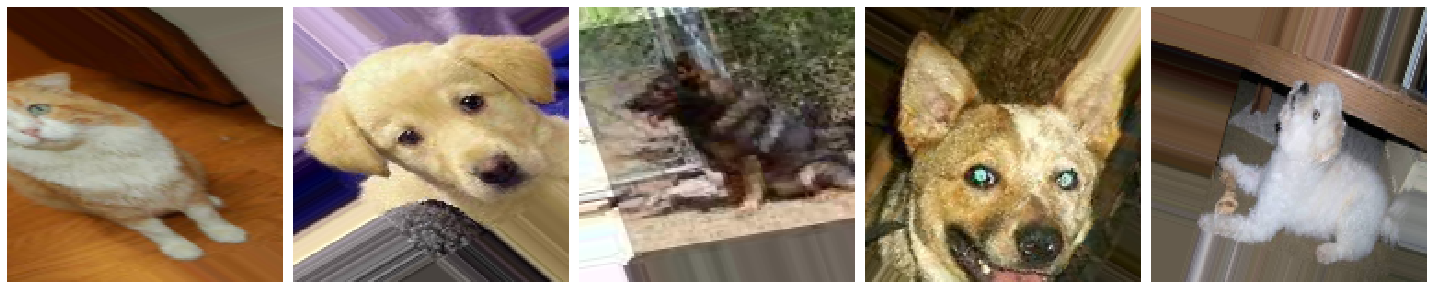

(None,
 array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 0., 1., 0., 0.], dtype=float32))

In [14]:
plotImages(sample_training_images), labels

# **Create the Model**

Dalam model ini menggunakan 3 layer dan setiap layer menggunakan activasi `relu`
digunakan pula dropout untuk menghindari kemungkinan overfiting

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# **Compile the Model**

In [0]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# **Model Summary**

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

# **Train the Model**

In [18]:
history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 8 steps
Epoch 1/50
16/16 [==============================] - 20s 1s/step - loss: 0.7748 - accuracy: 0.5160 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 16s 1s/step - loss: 0.6934 - accuracy: 0.4795 - val_loss: 0.6926 - val_accuracy: 0.5730
Epoch 3/50
16/16 [==============================] - 16s 1s/step - loss: 0.6923 - accuracy: 0.5305 - val_loss: 0.6874 - val_accuracy: 0.5080
Epoch 4/50
16/16 [==============================] - 17s 1s/step - loss: 0.6914 - accuracy: 0.5185 - val_loss: 0.6807 - val_accuracy: 0.5770
Epoch 5/50
16/16 [==============================] - 16s 1s/step - loss: 0.6770 - accuracy: 0.5555 - val_loss: 0.6479 - val_accuracy: 0.6180
Epoch 6/50
16/16 [==============================] - 16s 1s/step - loss: 0.6623 - accuracy: 0.5850 - val_loss: 0.6542 - val_accuracy: 

In [0]:
def visualize_training_result(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(fival_data_gengsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

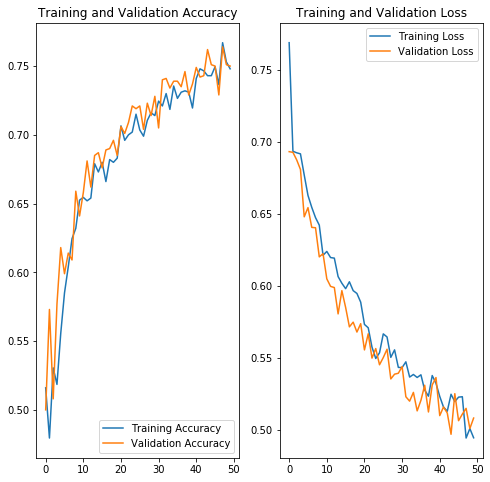

In [20]:
visualize_training_result(history)

Dari hasil visualisasi diatas tidak terlah overfiting namun dengan akurasi yang masih terbilang rendah yaitu : `0.75`

In [27]:
model.evaluate(val_data_gen)

  ...
    to  
  ['...']
8/8 [==============================] - 3s 332ms/step - loss: 0.5081 - accuracy: 0.7500


[0.5080884844064713, 0.75]

In [0]:
# load and prepare the image
def predict_cat_dog(path):
  img = load_img(path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  plt.imshow(img)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  result = model.predict(img)
  plt.xlabel('Cat' if result[0][0] == 0 else 'Dog')

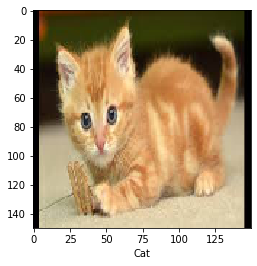

In [46]:
predict_cat_dog('/content/data_test/cat1.jpeg')

In [0]:
model.save('catdog_cnn_model.h5')